# Predictive Analytics: Assignment 3.2
#### Joshua Greenert
#### DSC630-T301 Predictive Analytics
#### 12/14/2022

In [1]:
# Import the required libaries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pull in the data to begin preparation.
df_mlb = pd.read_csv('dodgers-2022.csv')
df_mlb.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


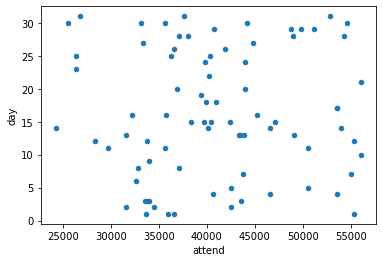

In [5]:
# Create some scatter plots to check the data.
ax = df_mlb.plot.scatter(x='attend', y='day', colormap='viridis')

There's nothing statistically significant with the day from this observation.  The hope was to find out whether there were more attendees during the beginning or end of the month.  However, this appears to be scattered randomly.

## Data Preparation

In [7]:
# Make dummies from the data.
df_mlb_dummies = pd.get_dummies(df_mlb)

# Show the new dataframe.
df_mlb_dummies.head(5)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


We can convert all of the categorical values to dummies so that the data can be researched further with predictions.  Additionally, certain columns can be removed since they would provide potential for false positives.  These columns include any of the columns that include a yes or no (cap, shirt, fireworks, bobblehead); the columns that are listed as no in this dataset provide no real insight to the outcome.  Therefore, we can remove them to improve our future predictions/feature selection.

In [11]:
# Remove the columns that don't provide insight.
df_mlb_dummies.drop(['cap_NO', 'shirt_NO', 'fireworks_NO', 'bobblehead_NO'], axis=1, inplace=True)

# Show the dataframe.
df_mlb_dummies.head(5)

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,opponent_Snakes,opponent_White Sox,skies_Clear,skies_Cloudy,day_night_Day,day_night_Night,cap_YES,shirt_YES,fireworks_YES,bobblehead_YES
0,10,56000,67,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,14,46549,57,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


## Charts and Graphs

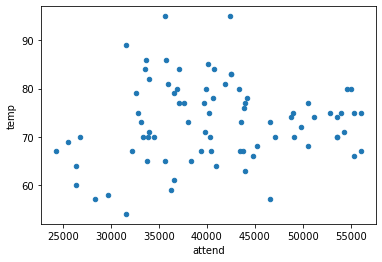

In [14]:
# Review the temperature.
ax = df_mlb_dummies.plot.scatter(x='attend', y='temp')

On the surface, this data doesn't look to provide much insight.  However, the data shows that at the highest levels of attendance typically has a range of 68 to 80 degrees for the weather.  This may prove useful later on the feature selection phase.

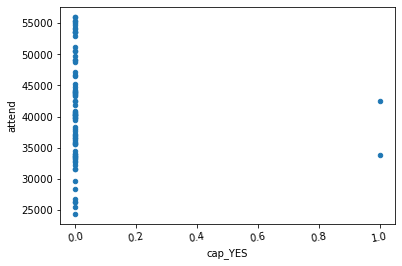

In [40]:
# Bar graphs with yes values for item giveaways.
# Set a new dataframe for this subplot process.
df_giveaways = pd.DataFrame(df_mlb_dummies, columns=['attend', 'cap_YES', 'shirt_YES', 'fireworks_YES', 'bobblehead_YES'])

# Show the caps.
ax = df_giveaways.plot.scatter(x='cap_YES', y='attend', rot=10)

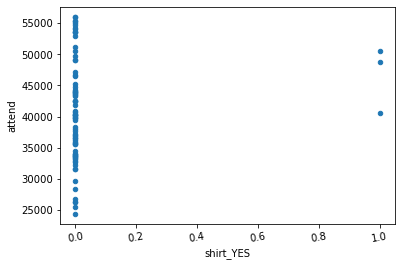

In [37]:
# Show the shirts.
ax = df_giveaways.plot.scatter(x='shirt_YES', y='attend', rot=10)

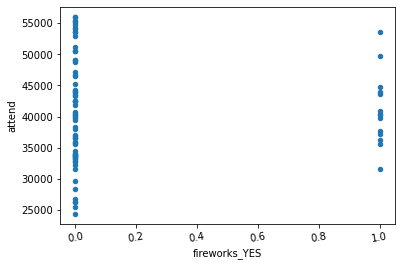

In [36]:
# Show the fireworks.
ax = df_giveaways.plot.scatter(x='fireworks_YES', y='attend', rot=10)

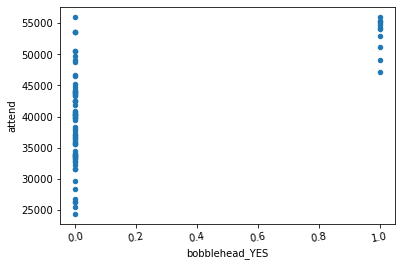

In [35]:
# Show the bobbleheads.
ax = df_giveaways.plot.scatter(x='bobblehead_YES', y='attend', rot=10)

When initially revewing the data, I presumed that the giveaways wouldn't be too insightful.  After providing more scatter plots, it's clear that bobblehead giveaways appear during the same time as the highest attendance.  Meanwhile, caps and fireworks didn't appear to be This is not conclusive yet, but may be a potential solution for the final recommendations.